NYC Amenities Analysis

This report includes:

- A summary of the analysis performed

- Discussion about each visualization

- Conclusion

- Recommendations for further investigations


### Summary

This project explored three preferences outlined by a group of 500 international delegates who would be working on a 2-year project in New York City. The group prioritized amenities: entertainment lounges, electric vehicle (EV) charging stations, and grocery shopping, of equal importance. The group also named Manhattan, Queens and Brooklyn as the boroughs that they prefer to live in for the duration of the project. We used grocery and lounge data from Yelp API calls as well as EV data from a New York State government website. This analysis seeks to gain preliminary insights about which NYC borough has the most offerings of amenities for the delegation. 

##### Metrics and Indicators:
The key metrics and performance indicators that have been analyzed in this project includes:

- The total number of all the named amenities in the three boroughs

- The counts of EV charging stations, lounges, and grocery stores in each borough

- The individual boroughs with the most of each amenity

- The borough that has the most amenities combined

- A map visualization of the combined borough counts 


##### Methodology:
The methodology includes:

- Descriptive statistics: Calculating, sum and other summary statistics.

- Comparative analysis: Comparing number of amenities in each borough.

- Data visualization: Map illustration of boroughs with combined amenities. 


### Discussion:
- Three dataframes were made from three csv files containing data for grocery stores, EV charging stations. and lounges in New York City. The dataframes were wrangled and cleaned to have only data for Brooklyn, Manhattan, and Queens; and with four columns:' City', 'Name' (of Business), 'Address', and 'Type' (amenity). The dataframes were then concatenated to create one dataframe. 

- Manhattan was found to have 102 EV charging stations, four times more than Brooklyn with 25, and more than ten times Queens with only 7. 

- Manhattan and Queens were both found to have 999 lounges, while Brooklyn had 919. 

- Queens was found to have 115 top grocery stores, Brooklyn 100, and Manhattan 78.

- Manhattan was found to have the most combined counts of all three amenities, 1179.

### Conclusion 
The analysis supports a preliminary recommendation that Manhattan be chosen to facilitate the delegation, since it has the most amenities combined, and is also the highest for EV charging stations. Manhattan also ties with Queens for most lounges. The delgation would need to look at the summary counts and other factors, including those recommended below, to make a final decision. 

### Recommendations for Further Investigation
- Check to see the exact locations of EV charging stations to see if another borough is equally or more convenient that Manhattan to access the amenity. 

- Check the NYC Dept of Building pax limits for lounges, as well as each establishment's policies on large groups to facilitate larger group meet-ups.

- Check to see how much of, and how often amenities will be needed to determine alternative arrangements.

- Check to see how easy it will be to commute to amenities by different modes of travel. 

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np   

# For visualizations
import matplotlib.pyplot as plt 
import geoviews.tile_sources as gts
import geoviews as gv
import os 

import warnings
warnings.filterwarnings('ignore')

## Task 1-Read the csv files to create and wrangle the Dataframes

In [2]:
# Read the csv files and create DataFrames
grocery_df = pd.read_csv('Resources/grocery.csv')
evcs_df = pd.read_csv('Resources/EVCS.csv')
lounge_df = pd.read_csv('Resources/lounge.csv')  

In [3]:
# Add a column to the dataframe to indicate the type of amenity
evcs_df['Type'] = 'EVCS'

# Specify the columns to keep
shrunk_evcs_df = evcs_df[['city', 'station_name', 'street_address', 'Type']]

# Rename the columns
shrunk_evcs_df = shrunk_evcs_df.rename(columns={'city': 'City', 'station_name': 'Name', 'street_address': 'Address'})

# Preview the dataframe
shrunk_evcs_df.head()

,City,Name,Address,Type
0,Fair Haven,Village of Fairhaven,14523 Cayuga St,EVCS
1,Hudson,The Wick Hotel - Tesla Destination,41 Cross St,EVCS
2,Tupper Lake,Faust Motel - Tesla Destination,151 Main St,EVCS
3,Avon,Avon,74 Genesee Street,EVCS
4,Saugerties,Holiday Inn Express & Suites,9 Old Route 32,EVCS


In [4]:
# Add a column to the dataframe to indicate the type of amenity
lounge_df['Type'] = 'Lounge'

# Preview the dataframe
lounge_df.head()

,City,Name,Address,Type
0,Manhattan,The Skylark,200 W 39th St,Lounge
1,Manhattan,The Living Room,153 West 57th St,Lounge
2,Manhattan,Raines Law Room,48 W 17th St,Lounge
3,Manhattan,Valerie,45 W 45th St between 5th & 6th Ave,Lounge
4,Manhattan,On The Rocks,696 10th Ave,Lounge


In [5]:
# Add a column to the dataframe to indicate the type of amenity
grocery_df['Type'] = 'Grocery'

# Preview the dataframe
grocery_df.head()

,City,Name,Address,Type
0,Manhattan,West Market,693 10th Ave,Grocery
1,Manhattan,Whole Foods Market,226 E 57th St,Grocery
2,Manhattan,gastro market,55TH St And Broadway,Grocery
3,Manhattan,Morton Williams,908 Second Avenue,Grocery
4,Manhattan,Fairway Market,2131 Broadway,Grocery


In [6]:
# Concatenate the dataframes
stacked_df = pd.concat([grocery_df, shrunk_evcs_df,lounge_df], ignore_index=True)

# Check the shape of the stacked dataframe
stacked_df.info()

# Preview the stacked dataframe
stacked_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     8920 non-null   object
 1   Name     8920 non-null   object
 2   Address  8909 non-null   object
 3   Type     8920 non-null   object
dtypes: object(4)
memory usage: 278.9+ KB


,City,Name,Address,Type
0,Manhattan,West Market,693 10th Ave,Grocery
1,Manhattan,Whole Foods Market,226 E 57th St,Grocery
2,Manhattan,gastro market,55TH St And Broadway,Grocery
3,Manhattan,Morton Williams,908 Second Avenue,Grocery
4,Manhattan,Fairway Market,2131 Broadway,Grocery


## Task 2-Drop duplicates and null values fron the stacked dataframe

In [7]:
# Drop rows with NaN values
clean_stacked_df= stacked_df.dropna()

# Drop duplicate rows
clean_stacked_df = clean_stacked_df.drop_duplicates()

# Reset index
clean_stacked_df =  clean_stacked_df.reset_index(drop=True)

In [8]:
# Preview the dataframe
clean_stacked_df.head()

,City,Name,Address,Type
0,Manhattan,West Market,693 10th Ave,Grocery
1,Manhattan,Whole Foods Market,226 E 57th St,Grocery
2,Manhattan,gastro market,55TH St And Broadway,Grocery
3,Manhattan,Morton Williams,908 Second Avenue,Grocery
4,Manhattan,Fairway Market,2131 Broadway,Grocery


In [9]:
print(len(clean_stacked_df))

8905


In [10]:
# Replace city names to collapse "Manhattan", "New York", and "New York City"
collapse = {'Manhattan': 'Manhattan', 'New York': 'Manhattan', 'New York City': 'Manhattan'}
clean_stacked_df.loc[:, 'City'] = clean_stacked_df['City'].replace(collapse)

In [11]:
# Create a dataframe with only the cities we want to compare
specific_cities = ['Manhattan', 'Brooklyn', 'Queens']
specific_city_df = clean_stacked_df[clean_stacked_df['City'].isin(specific_cities)]
print(len(specific_city_df))

6043


In [12]:
# Check that only Brooklyn, Manhattan, and Queens are in the data
unique_cities = specific_city_df['City'].unique()
print(unique_cities)

['Manhattan' 'Queens' 'Brooklyn']


## Task 3-Make a bar graph for total EV charging stations in each borough and export to Viz folder

In [13]:
# Filter the DataFrame to include only rows with 'EVCS' in the 'Type' column
evcs_df = specific_city_df[specific_city_df['Type'] == 'EVCS']

# Group by 'City' and get the EV charging stations counts
counts_evcs = evcs_df.groupby('City').size()

# Print the counts
counts_evcs

City
Brooklyn      25
Manhattan    102
Queens         7
dtype: int64

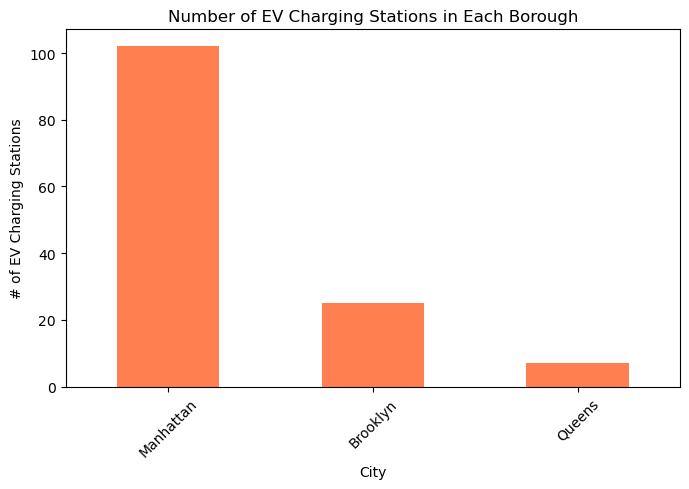

In [14]:
# Ensure the 'visualizations' folder exists
if not os.path.exists('Visualizations'):
    os.mkdir('Visualizations')
    
# Sort the EVCS series in descending order
sorted_counts_evcs = counts_evcs.sort_values(ascending=False)

# Format bars and labels
ax = sorted_counts_evcs.plot(kind='bar', figsize=(7, 5), color='coral')
ax.set_ylabel('# of EV Charging Stations')
ax.set_title('Number of EV Charging Stations in Each Borough')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the 'Visualizations' folder
plt.savefig('Visualizations/evcs_bar_plot.png')

# Display the plot
plt.show()

## Task 4-Make a bar graph for total lounges in each borough and export to Viz folder

In [15]:
# Filter the DataFrame to include only rows with 'Lounge' in the 'Type' column
lounge_df = specific_city_df[specific_city_df['Type'] == 'Lounge']

# Group by 'City' and get the EV charging stations count
counts_lounge = lounge_df.groupby('City').size()

# Print the counts
counts_lounge

City
Brooklyn     919
Manhattan    999
Queens       999
dtype: int64

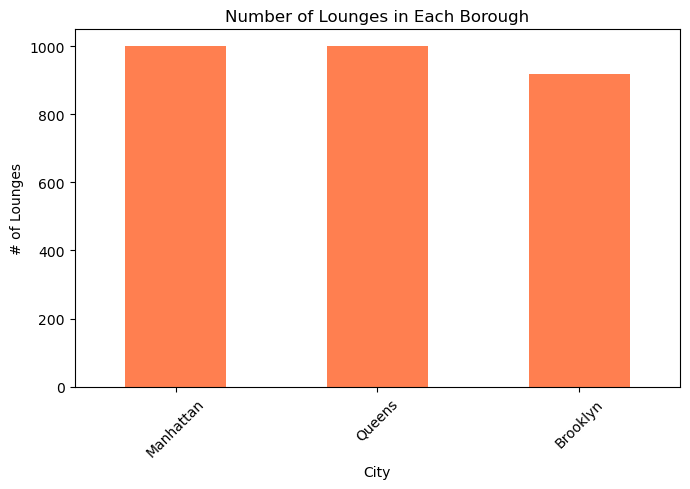

In [16]:
# Sort the Series in descending order
sorted_counts_lounge = counts_lounge.sort_values(ascending=False)

# Format bars and labels
ax = sorted_counts_lounge.plot(kind='bar', figsize=(7, 5), color='coral')
ax.set_ylabel('# of Lounges')
ax.set_title('Number of Lounges in Each Borough')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the 'Visualizations' folder
plt.savefig('Visualizations/lounge_bar_plot.png')

# Display the plot
plt.show()

## Task 5-Make a bar graph for the top 10 grocery stores in each borough and export to Viz folder

In [17]:
# Group the DataFrame by 'Name' and count the occurrences
store_counts = specific_city_df.groupby('Name').size()

# Sort the store counts in descending order and get the top 13 stores
top_10_stores = store_counts.sort_values(ascending=False).head(10)

# Print the top 13 stores
print(top_10_stores)


Name
Key Food                   62
CTown Supermarkets         47
Food Bazaar Supermarket    31
Whole Foods Market         27
Morton Williams            23
Trader Joe's               22
Foodtown                   21
Associated Supermarket     20
Ideal Food Basket          20
Bravo Supermarkets         19
dtype: int64


In [18]:
# number of popular chain grocers top 10
# Specify the cities you want to group by
three_boro = ['Brooklyn', 'Manhattan', 'Queens']
grocery_by_city_df = specific_city_df[specific_city_df['Type'] == 'Grocery']
# Filter the DataFrame to include only the specified cities
collapse_city_grocer_df = grocery_df[grocery_df['City'].isin(three_boro)]
collapse_city_grocer_df["City"].value_counts()
unique_collapse_city_grocer_df = collapse_city_grocer_df["Name"].value_counts()
list_grocer_df = pd.DataFrame(unique_collapse_city_grocer_df)
list_grocer_df_reset = list_grocer_df.reset_index()
top_10_grocer = list_grocer_df_reset.head(10)
top_10_grocer_list = top_10_grocer["index"].tolist()
#justify top 13 via descending count of chain grocer
#specify health food store
health_food_filter_df = collapse_city_grocer_df[collapse_city_grocer_df['Name'].isin(top_10_grocer_list)]
# Group by 'city' and get the countc
counts_food_chain = health_food_filter_df.groupby('City').size()
counts_food_chain

City
Brooklyn     100
Manhattan     78
Queens       115
dtype: int64

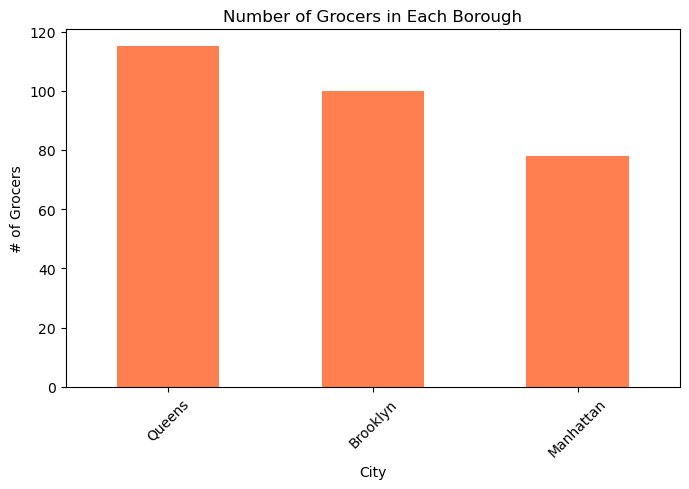

In [19]:
# Sort the Series in descending order
sorted_counts_grocery = counts_food_chain.sort_values(ascending=False)
# Format bars and labels
ax = sorted_counts_grocery.plot(kind='bar', figsize=(7, 5), color='coral')
ax.set_ylabel('# of Grocers')
ax.set_title('Number of Grocers in Each Borough')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot to the 'Visualizations' folder
plt.savefig('Visualizations/grocery_bar_plot.png')
# Display the plot
plt.show()

In [20]:
# Combine the counts for EVCS and lounges
combined_counts = sorted_counts_evcs.add(sorted_counts_lounge, fill_value=0)
combined_counts2 = combined_counts.add(sorted_counts_grocery, fill_value=0)
print (combined_counts2)
# Find the borough with the most combined counts
most_combined_borough = combined_counts2.idxmax()
most_combined_count = combined_counts2.max()
#combined_counts2
# Print the borough with the most combined counts
print(f"The borough with the most combined EVCS, lounges and groceries is {most_combined_borough} with {most_combined_count} counts.")

City
Brooklyn     1044
Manhattan    1179
Queens       1121
dtype: int64
The borough with the most combined EVCS, lounges and groceries is Manhattan with 1179 counts.


In [21]:
#map
map_points_df = pd.DataFrame(combined_counts2)
map_points_df_reset = map_points_df.reset_index()
map_points_df_reset.columns.values[1] = 'Count'
map_points_df_reset
# Create a dictionary containing coordinates
coordinates = {
     "Manhattan": (40.7831, -73.9712),
     "Brooklyn": (40.6782,-73.9442),
     "Queens": (40.7282, -73.7949),
}
# Add latitude and longitude columns to the DataFrame
map_points_df_reset['latitude'] = map_points_df_reset['City'].map(lambda city: coordinates[city][0])
map_points_df_reset['longitude'] = map_points_df_reset['City'].map(lambda city: coordinates[city][1])
# Normalize the counts to control dot sizes
max_count = map_points_df_reset['Count'].max()
map_points_df_reset['NormalizedCount'] = map_points_df_reset['Count'] / max_count
# Apply a scaling factor to control dot size
dot_scaling_factor = 60
map_points_df_reset['ScaledCount'] = map_points_df_reset['NormalizedCount'] * dot_scaling_factor
# Create a Points element
points = gv.Points(map_points_df_reset, kdims=['longitude', 'latitude'], vdims=['ScaledCount'])
# Create a Map with Points and a tile source
map_plot = gts.OSM() * points.opts(size='ScaledCount', color='ScaledCount', cmap='viridis', frame_height=400, frame_width=800)
# Add a color bar to the map
color_bar = points.opts(
    colorbar=True,
    colorbar_opts={'title': 'Count'}
)
# Display the map with color bar
(map_plot * color_bar).opts(legend_position='bottom_left');

<img src = "map.png" width="700"/> 